## Compute Cleaner Borders Batch

In [12]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import cv2
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
import os, sys
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import pickle

sys.path.append('../_2025/backprop_3') #Point to folder where plane_folding_utils.py is
sys.path.append('../')
from geometric_dl_utils import *
from geometric_dl_utils_simplified import *
from polytope_intersection_utils import intersect_polytopes
import matplotlib.pyplot as plt
from plane_folding_utils import *
from smoother_border_finding import *

In [5]:
def viz_descision_boundary(model, res=256):
    plt.clf()
    fig=plt.figure(0,(6,6))
    ax=fig.add_subplot(111)
    
    probe=np.zeros((res,res,2))
    for j, xx in enumerate(np.linspace(-1, 1, res)):
        for k, yy in enumerate(np.linspace(-1, 1, res)):
            probe[j, k]=[yy,xx]
    probe=probe.reshape(res**2, -1)
    with torch.no_grad():
        probe_logits=model(torch.tensor(probe).float())
        probe_logits=probe_logits.detach().numpy().reshape(res,res,2)
        probe_softmax = torch.nn.Softmax(dim=1)(torch.tensor(probe_logits.reshape(-1, 2)))
    
    ax.imshow(map.mean(2), cmap='gray')
    ax.imshow(np.flipud(np.argmax(probe_logits,2)), 
               extent=[0, 960, 960, 0],  # This maps to image coordinates
               alpha=0.7,
               cmap='viridis')
    return probe_logits

In [8]:
map=cv2.imread('Baarle-Nassau_-_Baarle-Hertog-en no legend.png')[:,:,(2,1,0)]

## 128

In [9]:
model_path='../models/128_1.pth'
model = BaarleNet([128])
model.load_state_dict(torch.load(model_path))
viz_scales=[0.07, 0.07, 0.04]
num_neurons=[128, 128, 2]

<Figure size 640x480 with 0 Axes>

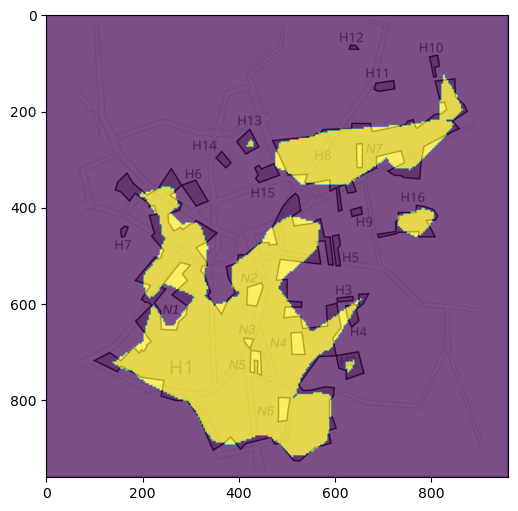

In [10]:
probe_logits=viz_descision_boundary(model)

In [15]:
boolean_img=np.argmax(probe_logits,2)
contours_interp = find_smooth_contours(
    boolean_img,
    min_contour_area=1,
    gaussian_sigma=0.1,
    method='subsample',
    num_points=100
)

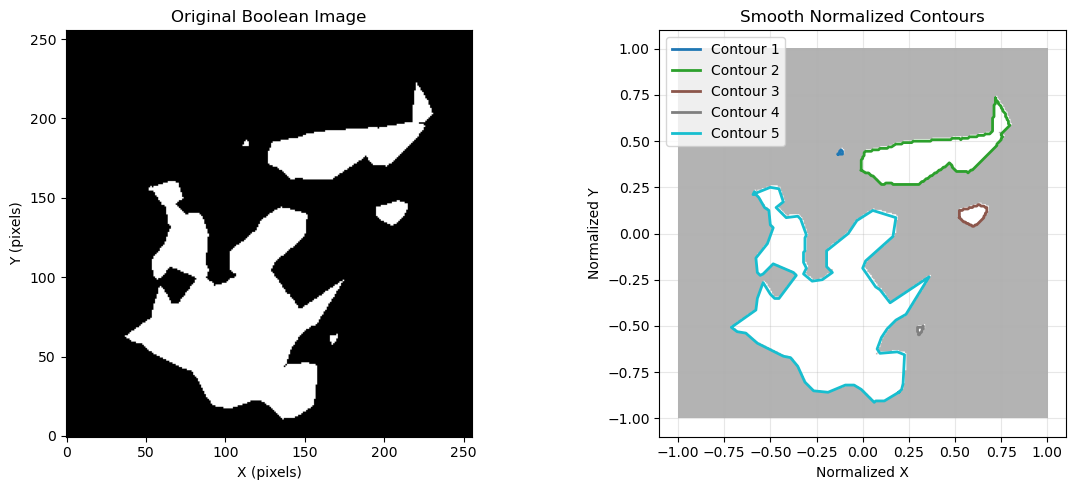

In [16]:
visualize_contours(boolean_img, contours_interp)

In [17]:
# np.save('../models/one_layer_1024_nuerons_long_borders.p', contours_interp)
with open('../models/128_1_borders.p', 'wb') as file:
    pickle.dump(contours_interp, file)

## 256

In [18]:
model_path='../models/256_1.pth'
model = BaarleNet([256])
model.load_state_dict(torch.load(model_path))
viz_scales=[0.07, 0.07, 0.04]
num_neurons=[256, 256, 2]

<Figure size 640x480 with 0 Axes>

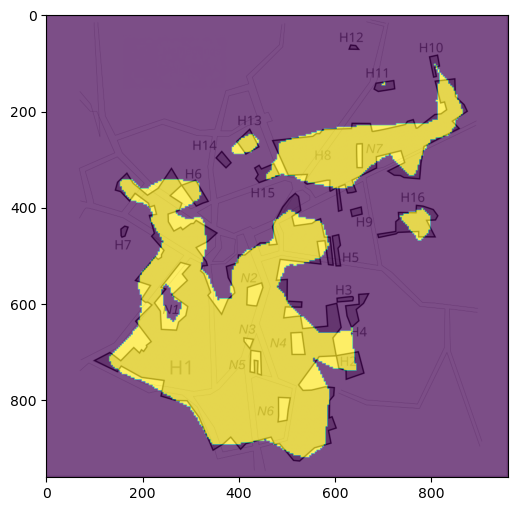

In [19]:
probe_logits=viz_descision_boundary(model)

In [20]:
boolean_img=np.argmax(probe_logits,2)
contours_interp = find_smooth_contours(
    boolean_img,
    min_contour_area=1,
    gaussian_sigma=0.1,
    method='subsample',
    num_points=100
)

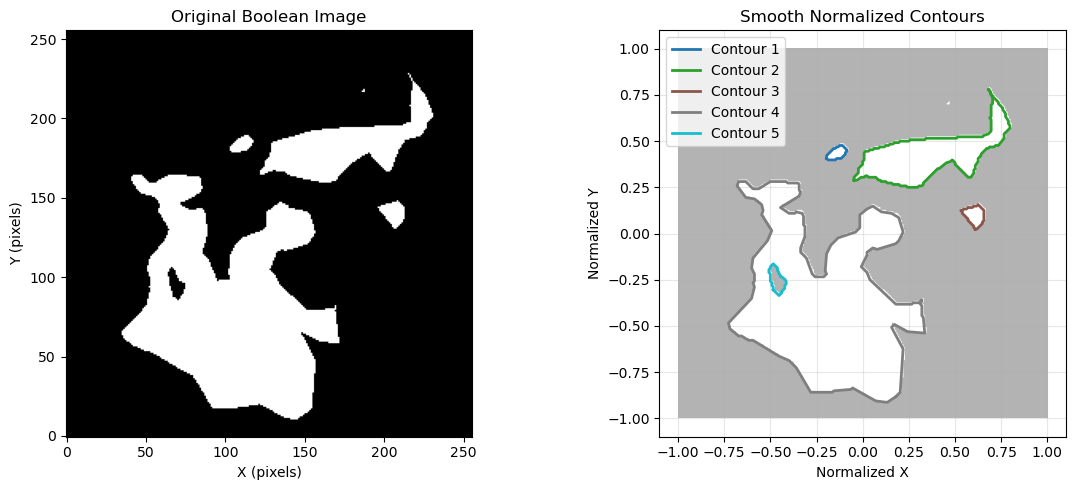

In [21]:
visualize_contours(boolean_img, contours_interp)

In [22]:
# np.save('../models/one_layer_1024_nuerons_long_borders.p', contours_interp)
with open('../models/256_1_borders.p', 'wb') as file:
    pickle.dump(contours_interp, file)

In [ ]:
# model_path='../models/256_1.pth'
# model = BaarleNet([256])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[256, 256, 2]

# model_path='../models/512_1.pth'
# model = BaarleNet([512])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[512, 512, 2]


# model_path='../models/one_layer_1024_nuerons_long.pth'
# model = BaarleNet([1024])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[1024, 1024, 2]

# model_path='../models/one_layer_10k_neurons_long.pth'
# model = BaarleNet([10000])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[10000, 10000, 2]

# model_path='../models/one_layer_100k_neurons_long.pth'
# model = BaarleNet([100000])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[100000, 100000, 2]